# Space Rocks! Meteorite Landings Analysis
Author - Mrudula Padhebettu

A meteorite is a solid piece of debris from an object, such as a comet, asteroid, or meteoroid, that originates in outer space and survives its passage through the atmosphere to reach the surface of a planet or moon. This
dataset is called Meteorite Landings. Each row of the dataset contains information about a meteorite landing. This comprehensive data set from The Meteoritical Society contains information on all of the known meteorite landings. In this Visulaization we will analyze the meteorite landings across the world. We will use different factors such as mass of the meteorites, year, its name, latitude and longitude to understand meteorite landings through visualizations.

Dataset Details :
Brief description of the each of the columns -

name: the name of the meteorite

id: a unique identifier for the meteorite

nametype: valid or relict
-- valid: a typical meteorite
-- relict: a meteorite that has been highly degraded by weather on Earth

recclass: the class of the meteorite; one of a large number of classes based on physical, chemical, and other characteristics
mass: the mass of the meteorite, in grams

fall: whether the meteorite was seen falling, or was discovered after its impact;fall or found
-- Fell: the meteorite's fall was observed
-- Found: the meteorite's fall was not observed

year: the year the meteorite fell, or the year it was found

reclat: the latitude of the meteorite's landing

reclong: the longitude of the meteorite's landing

GeoLocation: comma-separated tuple that combines reclat and reclong

Link to the dataset - https://www.kaggle.com/code/abhidubey007/meteorite-landings-analysis

Reference - https://www.kaggle.com/

In [1]:
import pandas as pd
import bqplot
import numpy as np
import traitlets
import ipywidgets as widgets
import matplotlib.pyplot as plt

In [2]:
Meteorite = pd.read_csv('Meteorite_Landing.csv')

In [3]:
Meteorite

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


In [4]:
#Sorting year in ascending order
Meteorite.sort_values(by=['year'],inplace=True)

In [5]:
Meteorite

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
704,Nogata,16988,Valid,L6,472.0,Fell,860.0,33.72500,130.75000,"(33.725, 130.75)"
679,Narni,16914,Valid,Stone-uncl,NaN,Fell,920.0,42.51667,12.51667,"(42.51667, 12.51667)"
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399.0,50.18333,12.73333,"(50.18333, 12.73333)"
856,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,1490.0,45.48333,9.51667,"(45.48333, 9.51667)"
283,Ensisheim,10039,Valid,LL6,127000.0,Fell,1491.0,47.86667,7.35000,"(47.86667, 7.35)"
...,...,...,...,...,...,...,...,...,...,...
38207,Valencia,24147,Valid,H5,33500.0,Found,NaN,39.00000,-0.03333,"(39.0, -0.03333)"
38231,Villa Regina,53827,Valid,"Iron, IIIAB",5030.0,Found,NaN,-39.10000,-67.06667,"(-39.1, -67.06667)"
38308,Wietrzno-Bobrka,24259,Valid,Iron,376.0,Found,NaN,49.41667,21.70000,"(49.41667, 21.7)"
38335,Wiltshire,56143,Valid,H5,92750.0,Found,NaN,51.14967,-1.81000,"(51.14967, -1.81)"


In [6]:
#Checking dataset for invalid years
Meteorite[Meteorite['year']>2022]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
30682,Northwest Africa 7701,57150,Valid,CK6,55.0,Found,2101.0,0.0,0.0,"(0.0, 0.0)"


In [7]:
#Dropping invalid years
Meteorite.drop(Meteorite[Meteorite['year']>2022].index, inplace=True)

In [8]:
#Checking dataset again
Meteorite[Meteorite['year']>2022]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation


In [9]:
#checking for null values
Meteorite.isnull()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
704,False,False,False,False,False,False,False,False,False,False
679,False,False,False,False,True,False,False,False,False,False
278,False,False,False,False,False,False,False,False,False,False
856,False,False,False,False,False,False,False,False,False,False
283,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
38207,False,False,False,False,False,False,True,False,False,False
38231,False,False,False,False,False,False,True,False,False,False
38308,False,False,False,False,False,False,True,False,False,False
38335,False,False,False,False,False,False,True,False,False,False


In [10]:
Meteorite.isnull().any()

name           False
id             False
nametype       False
recclass       False
mass (g)        True
fall           False
year            True
reclat          True
reclong         True
GeoLocation     True
dtype: bool

In [11]:
#Counting the null values in each column
Meteorite.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [12]:
#Dataset count row-wise for each column
Meteorite.count()

name           45715
id             45715
nametype       45715
recclass       45715
mass (g)       45584
fall           45715
year           45424
reclat         38400
reclong        38400
GeoLocation    38400
dtype: int64

In [13]:
#Dropping the null values from the Dataset
Meteorite.dropna(inplace=True)

In [14]:
#Count of null values after dropping null values
Meteorite.isnull().sum()

name           0
id             0
nametype       0
recclass       0
mass (g)       0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

In [15]:
#Datacount
Meteorite.count()

name           38114
id             38114
nametype       38114
recclass       38114
mass (g)       38114
fall           38114
year           38114
reclat         38114
reclong        38114
GeoLocation    38114
dtype: int64

In [16]:
#Counting rows where mass is zero/invalid
Meteorite[Meteorite['mass (g)']==0].count()

name           19
id             19
nametype       19
recclass       19
mass (g)       19
fall           19
year           19
reclat         19
reclong        19
GeoLocation    19
dtype: int64

In [17]:
#Dropping rows where mass is zero and invalid
Meteorite.drop(Meteorite[Meteorite['mass (g)']==0].index, inplace=True)

In [18]:
#Rechecking Counting rows where mass is zero after dropping
Meteorite[Meteorite['mass (g)']==0].count()

name           0
id             0
nametype       0
recclass       0
mass (g)       0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

In [19]:
#Dropping abnormal GeoLocations
Meteorite.drop(Meteorite[Meteorite['GeoLocation']=='(0.0, 0.0)'].index, inplace=True)

In [20]:
#Rechecking
print(Meteorite[Meteorite['GeoLocation']=='(0.0, 0.0)'].count())
Meteorite[Meteorite['GeoLocation']=='(0.0, 0.0)']

name           0
id             0
nametype       0
recclass       0
mass (g)       0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation


In [21]:
#Displaying the Dataset index 
Meteorite.index

Int64Index([  704,   278,   856,   283,  5365,   174, 26174,   410,   960,
              369,
            ...
             3425,  5408,    86, 38113, 17402, 17401, 37734, 36405, 30517,
              194],
           dtype='int64', length=31911)

In [22]:
#Reset index of Dataset
Meteorite.reset_index(inplace=True)

In [23]:
#Displaying Dataset index 
Meteorite.index

RangeIndex(start=0, stop=31911, step=1)

In [24]:
Meteorite

,index,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,704,Nogata,16988,Valid,L6,472.0,Fell,860.0,33.72500,130.75000,"(33.725, 130.75)"
1,278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399.0,50.18333,12.73333,"(50.18333, 12.73333)"
2,856,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,1490.0,45.48333,9.51667,"(45.48333, 9.51667)"
3,283,Ensisheim,10039,Valid,LL6,127000.0,Fell,1491.0,47.86667,7.35000,"(47.86667, 7.35)"
4,5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,1575.0,-27.46667,-60.58333,"(-27.46667, -60.58333)"
...,...,...,...,...,...,...,...,...,...,...,...
31906,17401,Ksar Ghilane 010,55605,Valid,L5,50.1,Found,2012.0,32.80600,9.83300,"(32.806, 9.833)"
31907,37734,Stewart Valley 012,55528,Valid,H6,130.0,Found,2012.0,36.23500,-116.18358,"(36.235, -116.18358)"
31908,36405,Rosamond,57434,Valid,LL3,11.1,Found,2012.0,34.82793,-118.14640,"(34.82793, -118.1464)"
31909,30517,Northwest Africa 7496,56314,Valid,Eucrite-pmict,788.4,Found,2012.0,22.94781,-13.38527,"(22.94781, -13.38527)"


In [25]:
#Latest Meteorite Found and Fall - not Observed)
found = Meteorite[Meteorite['fall']=='Found']
Meteorite[(Meteorite['year']==found['year'].max()) & (Meteorite['fall']=='Found')]

,index,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
31896,17267,Johannesburg,55765,Valid,H4,63.0,Found,2012.0,35.37788,-117.63728,"(35.37788, -117.63728)"
31897,17260,Jiddat al Harasis 799,57428,Valid,LL6,212.0,Found,2012.0,19.77278,56.38982,"(19.77278, 56.38982)"
31898,21715,Los Vientos 028,57338,Valid,H~5,12110.0,Found,2012.0,-24.68333,-69.76667,"(-24.68333, -69.76667)"
31899,22890,Mandalay Spring,57454,Valid,L6,2854.0,Found,2012.0,40.89201,-118.55319,"(40.89201, -118.55319)"
31901,3425,Antelope,57455,Valid,H4,754.0,Found,2012.0,40.90183,-118.54465,"(40.90183, -118.54465)"
31902,5408,Catalina 009,57173,Valid,CR2,5.2,Found,2012.0,-25.23333,-69.71667,"(-25.23333, -69.71667)"
31904,38113,Tupelo,56551,Valid,EL6,280.0,Found,2012.0,34.24216,-88.77594,"(34.24216, -88.77594)"
31905,17402,Ksar Ghilane 011,55606,Valid,L4,25.6,Found,2012.0,32.89100,9.91300,"(32.891, 9.913)"
31906,17401,Ksar Ghilane 010,55605,Valid,L5,50.1,Found,2012.0,32.80600,9.83300,"(32.806, 9.833)"
31907,37734,Stewart Valley 012,55528,Valid,H6,130.0,Found,2012.0,36.23500,-116.18358,"(36.235, -116.18358)"


In [26]:
#Heaviest Meteorites for each year
groupby_year = Meteorite.groupby('year')
groupby_year['mass (g)'].max()

year
860.0          472.0
1399.0      107000.0
1490.0         103.3
1491.0      127000.0
1575.0    50000000.0
             ...    
2009.0     1600000.0
2010.0      100000.0
2011.0       50000.0
2012.0       12110.0
2013.0      100000.0
Name: mass (g), Length: 252, dtype: float64

In [27]:
table1 = pd.pivot_table(Meteorite[:10], values='mass (g)', index=['year'],columns=['fall'], aggfunc=np.sum)
table1

fall,Fell,Found
year,,
860.0,472.0,NaN
1399.0,107000.0,NaN
1490.0,103.3,NaN
1491.0,127000.0,NaN
1575.0,NaN,50000000.0
1583.0,15000.0,NaN
1600.0,NaN,10100000.0
1621.0,1967.0,NaN
1623.0,10400.0,NaN


In [28]:
table2 = pd.pivot_table(Meteorite[:10],values='mass (g)',index=['year'],columns=['nametype'], aggfunc=np.sum)
table2

nametype,Valid
year,
860.0,472.0
1399.0,107000.0
1490.0,103.3
1491.0,127000.0
1575.0,50000000.0
1583.0,15000.0
1600.0,10100000.0
1621.0,1967.0
1623.0,10400.0


In [29]:
# Set up x/y scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# Set p axis
x_ax = bqplot.Axis(scale = x_sc, label='Longitude')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label='Latitude')

#(1) set up marks
scatters = bqplot.Scatter(x = Meteorite['reclong'],
                          y = Meteorite['reclat'],
                          scales = {'x': x_sc, 'y': y_sc})

fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax]) 
fig

Figure(axes=[Axis(label='Longitude', scale=LinearScale()), Axis(label='Latitude', orientation='vertical', scal…

In [30]:
@widgets.interact(x_axis=['reclat', 'reclong', 'fall', 'id','nametype','year' ], y_axis=['reclat', 'reclong','fall', 'nametype','year', 'id'])
def make_plot(x_axis, y_axis):
 fig = plt.scatter(Meteorite[x_axis], Meteorite[y_axis], c=(Meteorite['id']))
 plt.show()

interactive(children=(Dropdown(description='x_axis', options=('reclat', 'reclong', 'fall', 'id', 'nametype', '…

In [31]:
#Interact creates user interface (UI) controls for choosing variables and visualize data accordingly
@widgets.interact(numerical=['reclat', 'reclong', 'id','year'], categorical = ['fall', 'nametype'], bins=(1,100,5))
def make_hist(numerical, categorical, bins):
 plt.figure(figsize=(50,50), dpi=80)
 Meteorite.hist(column = numerical, bins = bins)
 plt.show()
 Meteorite[categorical].value_counts().plot(kind='bar')
 plt.show()

interactive(children=(Dropdown(description='numerical', options=('reclat', 'reclong', 'id', 'year'), value='re…

Interactivity with the widgets will help us understand the relationship between different columns in the dataset. For example - if you choose fall in x-axis and year in y-axis we can find the different meteorites that were observed or not observed in a particular year. Similarly if we choose id as x-axis and nametype as y-axis we can find the meteorites that is a typical meteorite or a meteorite that has been degraded due to the weather on earth based on the id of the meteorites. These plots helps us in understanding the relationship between different columns.

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

<Figure size 720x720 with 0 Axes>

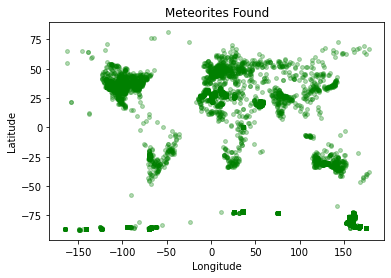

In [32]:
#More Plots
plt.figure(figsize=(10,10))
ax =  Meteorite.plot(kind='scatter', x='reclong', y='reclat',color="green", s=15, alpha=0.3)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.title("Meteorites Found")
plt.tight_layout

In [33]:
def generate_histogram_from_lat_long(Meteorite, nlong=20, nlat=20, longmin=-150, longmax=150,
                                     latmin=-40, latmax=70,
                                     takeLog=True):
    long_bins = np.linspace(longmin, longmax, nlong+1)
    lat_bins = np.linspace(latmin, latmax, nlat+1)
    hist2d, long_edges, lat_edges = np.histogram2d(Meteorite['reclong'], 
                                                   Meteorite['reclat'], 
                                                   weights=Meteorite['mass (g)'],
                                                  bins = [long_bins,lat_bins])
    hist2d = hist2d.T
    if takeLog:
        hist2d[hist2d <= 0] = np.nan # set zeros to NaNs
        # then take log
        hist2d = np.log10(hist2d)
    long_centers = (long_edges[:-1] + long_edges[1:]) / 2
    lat_centers = (lat_edges[:-1] + lat_edges[1:]) / 2
    return hist2d, long_centers, lat_centers, long_edges, lat_edges

In [34]:
hist2d, long_centers, lat_centers, long_edges, lat_edges = generate_histogram_from_lat_long(Meteorite)

In [35]:
hist2d.shape

(20, 20)

In [36]:
long_centers

array([-142.5, -127.5, -112.5,  -97.5,  -82.5,  -67.5,  -52.5,  -37.5,
        -22.5,   -7.5,    7.5,   22.5,   37.5,   52.5,   67.5,   82.5,
         97.5,  112.5,  127.5,  142.5])

In [37]:
long_edges

array([-150., -135., -120., -105.,  -90.,  -75.,  -60.,  -45.,  -30.,
        -15.,    0.,   15.,   30.,   45.,   60.,   75.,   90.,  105.,
        120.,  135.,  150.])

In [38]:
len(long_centers), len(long_edges)

(20, 21)

In [39]:
# plot data with grid heat map

# 2. scales
col_sc = bqplot.ColorScale(scheme='RdPu')
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# 3. axis
col_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
x_ax = bqplot.Axis(scale=x_sc, label='Longitude')
y_ax = bqplot.Axis(scale=y_sc, orientation='vertical', label='Latitude')

# 4. marks
heat_map = bqplot.GridHeatMap(color=hist2d,
                             row=lat_centers,
                             column=long_centers, 
                             scales={'color':col_sc,'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'},
                             selected_style={'fill':'blue'})

fig = bqplot.Figure(marks=[heat_map], axes=[col_ax,x_ax, y_ax])
fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='RdPu'), side='right'), Axis(label='Lon…

In [40]:
#### GRID HEAT MAP #####

# 2. scales
col_sc = bqplot.ColorScale(scheme='RdPu')
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# 3. axis
col_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
x_ax = bqplot.Axis(scale=x_sc, label='Longitude')
y_ax = bqplot.Axis(scale=y_sc, orientation='vertical', label='Latitude')

# 4. marks
heat_map = bqplot.GridHeatMap(color=hist2d,
                             row=lat_centers,
                             column=long_centers, 
                             scales={'color':col_sc,'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'},
                             selected_style={'fill':'blue'})

fig = bqplot.Figure(marks=[heat_map], axes=[col_ax,x_ax, y_ax])

In [41]:
myLabel = widgets.Label()

In [42]:
# 2. scales
col_sc = bqplot.ColorScale(scheme='RdPu')
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# 3. axis
col_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
x_ax = bqplot.Axis(scale=x_sc, label='Longitude')
y_ax = bqplot.Axis(scale=y_sc, orientation='vertical', label='Latitude')

# 4. marks
heat_map = bqplot.GridHeatMap(color=hist2d,
                             row=lat_centers,
                             column=long_centers, 
                             scales={'color':col_sc,'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'},
                             selected_style={'fill':'blue'})

fig = bqplot.Figure(marks=[heat_map], axes=[col_ax,x_ax, y_ax])

In [43]:
def on_selection(change):
    if len(change['owner'].selected==1): # only allow user to select one grid
        i,j = change['owner'].selected[0]
        v = hist2d[i,j]
        myLabel.value = 'Mass (g)=' + str(v)

In [44]:
heat_map.observe(on_selection,'selected')

In [45]:
myDashboard = widgets.VBox([myLabel,fig])
myDashboard

In [46]:
#### GRID HEAT MAP #####

# 2. scales
col_sc = bqplot.ColorScale(scheme='RdPu')
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# 3. axis
col_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
x_ax = bqplot.Axis(scale=x_sc, label='Longitude')
y_ax = bqplot.Axis(scale=y_sc, orientation='vertical', label='Latitude')

# 4. marks
heat_map = bqplot.GridHeatMap(color=hist2d,
                             row=lat_centers,
                             column=long_centers, 
                             scales={'color':col_sc,'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'},
                             selected_style={'fill':'blue'})

fig = bqplot.Figure(marks=[heat_map], axes=[col_ax,x_ax, y_ax])

In [47]:
myLabel = widgets.Label()

In [48]:
####### BAR PLOT ######
# 2. scales
x_scb = bqplot.LinearScale()
y_scb = bqplot.LinearScale()
# 3. axis 
x_axb = bqplot.Axis(label='Year', scale=x_scb)
y_axb = bqplot.Axis(label='mass (g)', scale=y_scb, orientation='vertical')

# masking
i,j = 19, 0 # this has a lot of data (I think!)
minLong, maxLong = long_edges[j], long_edges[j+1]
minLat, maxLat = lat_edges[i],lat_edges[i+1]
# want all the data that has long >= minLong AND long <= maxLong AND lat >= minLat AND lat <= maxLat
region_mask = (Meteorite['reclong']>=minLong) & (Meteorite['reclong']<=maxLong) &\
    (Meteorite['reclat']>=minLat) & (Meteorite['reclat']<=maxLat)


In [49]:
Meteorite['year']

0         860.0
1        1399.0
2        1490.0
3        1491.0
4        1575.0
          ...  
31906    2012.0
31907    2012.0
31908    2012.0
31909    2012.0
31910    2013.0
Name: year, Length: 31911, dtype: float64

In [50]:

mass, mass_edges = np.histogram(Meteorite['year'][region_mask], 
                             weights=Meteorite['mass (g)'][region_mask], bins=10)

In [51]:
mass

array([   0.,    0.,    0.,    0.,    0., 9830.,    0.,    0.,    0.,
          0.])

In [52]:
mass_edges

array([1997.5, 1997.6, 1997.7, 1997.8, 1997.9, 1998. , 1998.1, 1998.2,
       1998.3, 1998.4, 1998.5])

In [53]:
len(mass), len(mass_edges)

(10, 11)

In [54]:
mass_centers = (mass_edges[:-1] + mass_edges[1:])/2 # fancy inline programming

In [55]:
mass_centers

array([1997.55, 1997.65, 1997.75, 1997.85, 1997.95, 1998.05, 1998.15,
       1998.25, 1998.35, 1998.45])

In [56]:
mass_hist = bqplot.Bars(x=mass_centers, y=mass, scales={'x':x_scb, 'y':y_scb})

In [57]:
fig_bars = bqplot.Figure(marks=[mass_hist],axes=[x_axb, y_axb])
#fig_bars

In [58]:
mass_hist.keys

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'align',
 'apply_clip',
 'base',
 'color',
 'color_mode',
 'colors',
 'display_legend',
 'enable_hover',
 'fill',
 'interactions',
 'label_display',
 'label_display_format',
 'label_display_horizontal_offset',
 'label_display_vertical_offset',
 'label_font_style',
 'labels',
 'opacities',
 'opacity_mode',
 'orientation',
 'padding',
 'preserve_domain',
 'scales',
 'scales_metadata',
 'selected',
 'selected_style',
 'stroke',
 'stroke_width',
 'tooltip',
 'tooltip_location',
 'tooltip_style',
 'type',
 'unselected_style',
 'visible',
 'x',
 'y']

In [59]:
def on_selection(change):
    if len(change['owner'].selected==1): # only allow user to select one grid
        i,j = change['owner'].selected[0]
        v = hist2d[i,j]
        myLabel.value = 'mass (g)' + str(v)
        # update mask based on new i,j combo
        minLong, maxLong = long_edges[j], long_edges[j+1]
        minLat, maxLat = lat_edges[i],lat_edges[i+1]
        region_mask = (Meteorite['reclong']>=minLong) & (Meteorite['reclong']<=maxLong) &\
            (Meteorite['reclat']>=minLat) & (Meteorite['reclat']<=maxLat)
        mass, mass_edges = np.histogram(Meteorite['year'][region_mask], 
                                     weights=Meteorite['mass (g)'][region_mask], bins=10) 
        mass_centers = (mass_edges[:-1] + mass_edges[1:])/2 # fancy inline programming
        mass_hist.x=mass_centers
        mass_hist.y=mass
        
heat_map.observe(on_selection,'selected')

In [60]:
figures = widgets.HBox([fig,fig_bars])
fig.layout.min_width='600px'
fig_bars.layout.min_width='600px'
dashboard = widgets.VBox([myLabel,figures])

In [61]:
dashboard

Dashboards created to visualize the data 
1) ipywidgets - The interact function (ipywidgets.interact) automatically creates user interface (UI) controls for exploring code and data interactively. 

2) Using a gridheatmap and histogram - Grid Heat Maps are used to visualize the magnitude and relationships of certain values through a matrix of columns and rows and a histogram is a graphical representation that organizes a group of data points into user-specified ranges.

Firstly, We have included the NaN values in the dataset so we can get accurate results using the dataset. If we click on any box that contains NaN values, NaN is retured as mean.
We have used 'RdPu' as the color scaling for the heatmap.The scale used for x-axis and y-axis is Linear scale. We chose Linear scale as we are visually showing the scale of a map. We have not used any color scaling for the histogram. Due to the presence of numerical values the axes scales used are LinearScale. The linear scale helps in clearly showing the scale for the range of latitudes covered by the map. The number of bins being created has been set to 10 to represent more values. Default vaules are used for Plot size and Label size. For the Dashboard, with grid heatmap and histogram are next to one another, we have set the plot size fixed to 600px. This can be modified depending on the screen size as needed. The grid heat map uses three variables - latitude, longitude, mass in grams. The histogram uses mass and year. When the user clicks on a particular grid in the Gridheatmap, the histogram displays the mass of the meteroite that has been found in that particular year. The mean of the mass in grams is also displayed in the dashboard. When the user clicks on NaN values no data is displayed and NaN is retured as mean.

In [62]:
#More Visulaizations

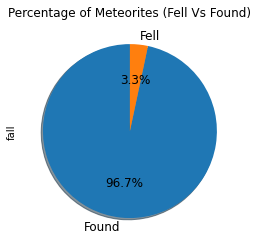

In [63]:
#Visualization to check the count of meteorites based on % of Meteorites Fell and Found
types = Meteorite['fall'].value_counts()
types.plot.pie(autopct='%1.1f%%', fontsize=12, shadow=True, startangle=90, title='Percentage of Meteorites (Fell Vs Found)')

Text(0.5, 1.0, 'Count of Meteorites (Fell Vs Found)')

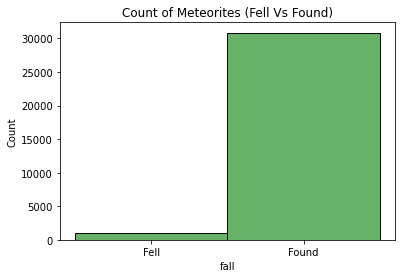

In [64]:
#Visualization to check the count of meteorites based on - Fell: the meteorite's fall was observed and 
#Found: the meteorite's fall was not observed
import seaborn as sns
sns.histplot(data=Meteorite['fall'],color='g',alpha=0.6).set_title('Count of Meteorites (Fell Vs Found)')

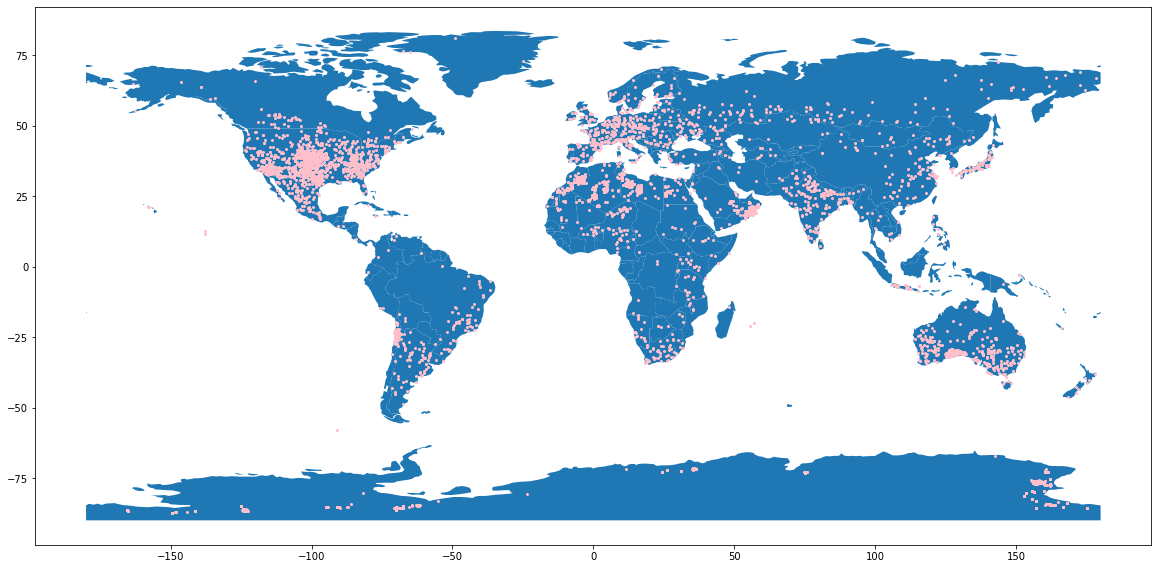

In [65]:
#Visualization to show the meteorite landing using the world map as the base map. This visualization shows where the meteorites
#have landed by ploting its location using latitude and longitude.

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry = [Point(xy) for xy in zip(Meteorite['reclong'], Meteorite['reclat'])]
gdf = GeoDataFrame(Meteorite, geometry=geometry)   

# map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20, 18)), marker='.', color='pink', markersize=16);

#Reference - https://stackoverflow.com/

# Contextual Datasets

Significant Earthquakes

The two contextual datasets i have chosen are : Significant Earthquakes, 1965-2016 and Volcano Eruptions. Both these datasets have latitude and longitude values. Latitude and Longitude values can be used to plot the visualization to show the meteorite landing using the world map as the base map. I have plotted the graph using these values to show the locations of earthquakes and volcanos. 

The earthquake dataset, determines the location and size of all significant earthquakes that occur worldwide. The data is collected by The National Earthquake Information Center (NEIC). The NEIC is the national data center and archive for earthquake information. It compiles and provides to scientists and to the public an extensive seismic database that serves as a foundation for scientific research
This dataset includes a record of the date, time, location, depth, magnitude, and source of every earthquake with a reported magnitude 5.5 or higher since 1965.

The detailed columns in the dataset are - Date, Time, Latitude, Longitude, Type, Depth, Depth Error, Depth Seismic Stations, Magnitude, Magnitude Type, Magnitude Error, Magnitude Seismic Stations, Azimuthal Gap, Horizontal Distance, Horizontal Error, Root Mean Square, ID, Source, Location Source, Magnitude Source, Status

Reference - https://www.kaggle.com/datasets/usgs/earthquake-database

In [66]:
earthquake = pd.read_csv('significant_earthquakes.csv')

In [67]:
earthquake

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


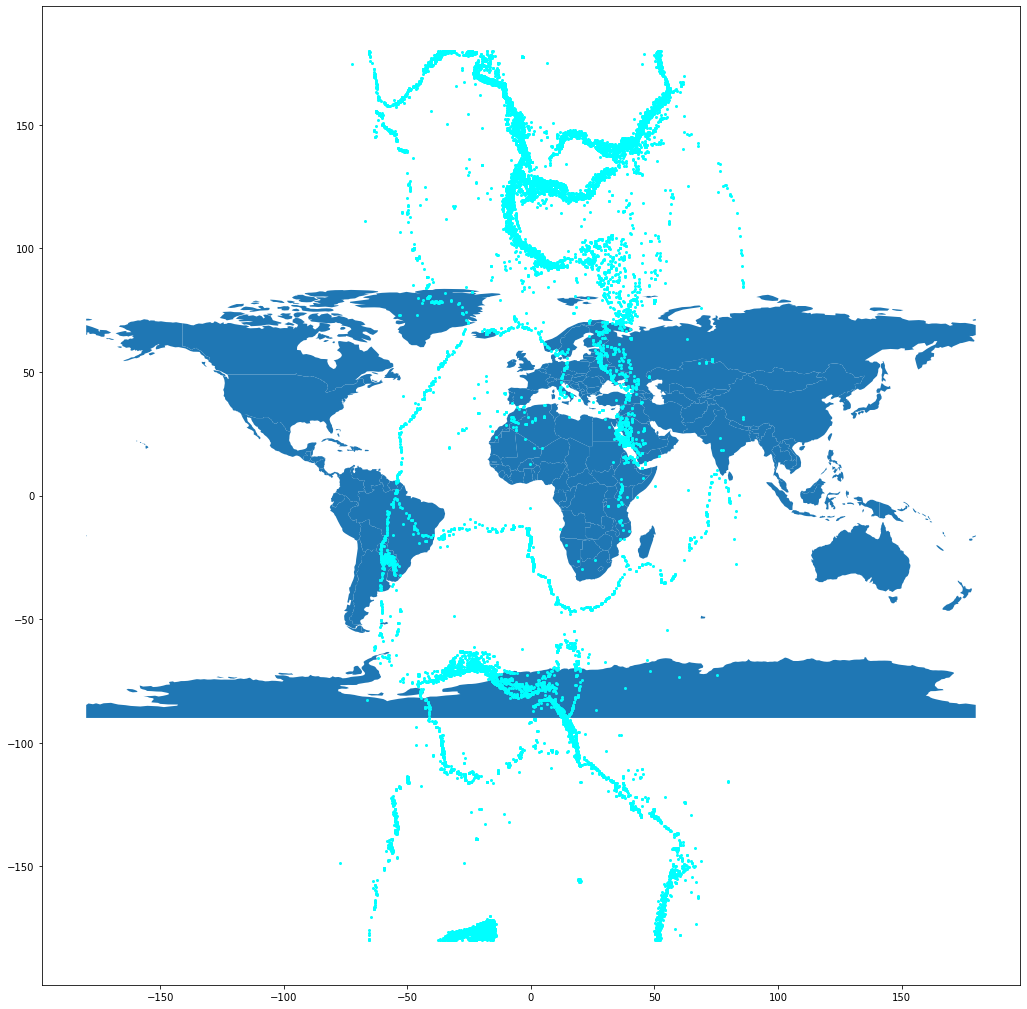

In [68]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry = [Point(xy) for xy in zip(earthquake['Latitude'], earthquake['Longitude'])]
gdf = GeoDataFrame(earthquake, geometry=geometry)   

# map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20, 18)), marker='.', color='cyan', markersize=16);

Volcano Eruptions

I have used the Volcano Eruptions dataset for the second conceptual visualization to display the visulaization which shows the Volcano Eruptions in different parts of the world on a world map.

A volcano is a rupture in the crust of a planetary-mass object, such as Earth, that allows hot lava, volcanic ash, and gases to escape from a magma chamber below the surface. Earth's volcanos occur because its crust is broken into 17 major, rigid tectonic plates that float on a hotter, softer layer in its mantle. Therefore, on Earth, volcanoes are generally found where tectonic plates are diverging or converging, and most are found underwater.

The dataset includes the following columns - volcano_number, volcano_name, primary_volcano_type, last_eruption_year, country, region, subregion, latitude, longitude, elevation, tectonic_settings, major_rock_1, major_rock_2, major_rock_3, major_rock_4, major_rock_5, minor_rock_1, minor_rock_2, minor_rock_3, minor_rock_4, minor_rock_5, population_within_5_km, population_within_10_km, population_within_30, population_within_100_km

Reference - https://www.kaggle.com/datasets/jessemostipak/volcano-eruptions

In [69]:
volcano = pd.read_csv('volcano.csv', encoding= 'unicode_escape')

In [70]:
volcano

,volcano_number,volcano_name,primary_volcano_type,last_eruption_year,country,region,subregion,latitude,longitude,elevation,...,major_rock_5,minor_rock_1,minor_rock_2,minor_rock_3,minor_rock_4,minor_rock_5,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km
0,283001,Abu,Shield(s),-6850,Japan,"Japan, Taiwan, Marianas",Honshu,34.500,131.600,641,...,Â,Â,Â,Â,Â,Â,3597,9594,117805,4071152
1,355096,Acamarachi,Stratovolcano,Unknown,Chile,South America,"Northern Chile, Bolivia and Argentina",-23.292,-67.618,6023,...,Â,Â,Â,Â,Â,Â,0,7,294,9092
2,342080,Acatenango,Stratovolcano(es),1972,Guatemala,MÃ©xico and Central America,Guatemala,14.501,-90.876,3976,...,Â,Basalt / Picro-Basalt,Â,Â,Â,Â,4329,60730,1042836,7634778
3,213004,Acigol-Nevsehir,Caldera,-2080,Turkey,Mediterranean and Western Asia,Turkey,38.537,34.621,1683,...,Â,Â,Â,Â,Â,Â,127863,127863,218469,2253483
4,321040,Adams,Stratovolcano,950,United States,Canada and Western USA,USA (Washington),46.206,-121.490,3742,...,Â,Dacite,Â,Â,Â,Â,0,70,4019,393303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,300242,Zimina,Stratovolcano(es),Unknown,Russia,Kamchatka and Mainland Asia,Kamchatka Peninsula,55.862,160.603,3057,...,Â,Â,Â,Â,Â,Â,0,0,77,11184
954,341061,Zitacuaro-Valle de Bravo,Caldera,-3050,Mexico,MÃ©xico and Central America,Mexico,19.400,-100.250,3500,...,Â,Trachyandesite / Basaltic Trachyandesite,Trachybasalt / Tephrite Basanite,Â,Â,Â,231977,231977,490440,4838069
955,221020,Zubair Group,Shield,2013,Yemen,Africa and Red Sea,Africa (northeastern) and Red Sea,15.050,42.180,191,...,Â,Â,Â,Â,Â,Â,7,7,7,671171
956,221021,Zukur,Shield,Unknown,Yemen,Africa and Red Sea,Africa (northeastern) and Red Sea,14.020,42.750,624,...,Â,Â,Â,Â,Â,Â,508,922,1075,1472800


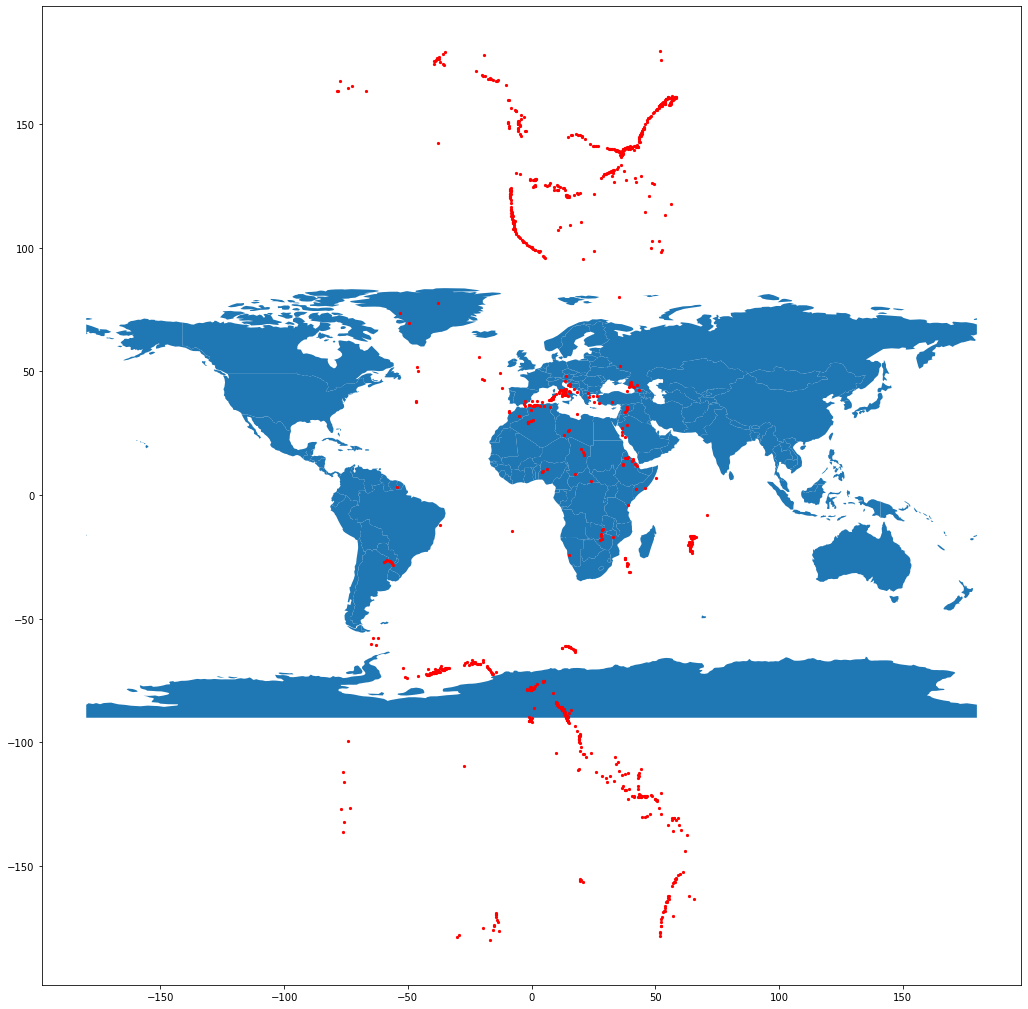

In [71]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry = [Point(xy) for xy in zip(volcano['latitude'], volcano['longitude'])]
gdf = GeoDataFrame(volcano, geometry=geometry)   

# map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20, 18)), marker='.', color='red', markersize=19);